In [180]:
import pandas as pd
import os
import re
from collections import Counter
import folium
import webbrowser
import csv
from folium.plugins import FastMarkerCluster
import matplotlib.pyplot as plt
import matplotlib.pyplot as pyplt

In [181]:
airbnb_df = pd.read_csv('./Clean_Data/AirBNB_Data.csv')
starbucks_df = pd.read_csv('./Clean_Data/Starbucks_Data.csv')
bnbCleanLon=pd.read_csv('./Clean_Data/London_AirBNB_Data.csv')
starCleanLon=pd.read_csv('./Clean_Data/London_Starbucks_Data.csv')

# AirBNB Data Cleaning

In [182]:
display(airbnb_df.info())
display(airbnb_df.shape)
airbnb_columns = airbnb_df.columns.to_list()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5367 entries, 0 to 5366
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              5367 non-null   int64  
 1   description                     5367 non-null   object 
 2   neighborhood_overview           5367 non-null   object 
 3   host_neighbourhood              5367 non-null   object 
 4   neighbourhood_cleansed          5367 non-null   object 
 5   latitude                        5367 non-null   float64
 6   longitude                       5367 non-null   float64
 7   property_type                   5367 non-null   object 
 8   room_type                       5367 non-null   object 
 9   accommodates                    5367 non-null   int64  
 10  bathrooms_text                  5367 non-null   object 
 11  bedrooms                        5367 non-null   float64
 12  beds                            53

None

(5367, 33)

In [183]:
airbnb_columns_tokeep = \
['id',
 'description',
 'neighborhood_overview',
 'host_neighbourhood',
 'neighbourhood_cleansed',
 'latitude',
 'longitude',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms_text',
 'bedrooms',
 'beds',
 'price',

 'has_availability',
 'number_of_reviews',
 'number_of_reviews_ltm',
 'number_of_reviews_l30d',
 'first_review',
 'last_review',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'instant_bookable',
 'calculated_host_listings_count',
 'reviews_per_month']


In [184]:
#Reviewed total of 75 original columns, eliminated unnecessary columns or columns 
#with excessively null data
airbnb_df = airbnb_df[airbnb_columns_tokeep]
# filled null values with -1 for easy identification - no organic data would contain -1
airbnb_df.fillna(-1,inplace=True)
# airbnb_df

In [185]:
display(airbnb_df.info())
# reviewed for columns with inappropriate data types, identified:
# bathrooms_text, price, first_review, last_review

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5367 entries, 0 to 5366
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              5367 non-null   int64  
 1   description                     5367 non-null   object 
 2   neighborhood_overview           5367 non-null   object 
 3   host_neighbourhood              5367 non-null   object 
 4   neighbourhood_cleansed          5367 non-null   object 
 5   latitude                        5367 non-null   float64
 6   longitude                       5367 non-null   float64
 7   property_type                   5367 non-null   object 
 8   room_type                       5367 non-null   object 
 9   accommodates                    5367 non-null   int64  
 10  bathrooms_text                  5367 non-null   object 
 11  bedrooms                        5367 non-null   float64
 12  beds                            53

None

In [186]:
#Removing Price outliers (found to be likely glitches / faulty data)
airbnb_df = airbnb_df.loc[airbnb_df['price'] < 2001]
#Changing first and last reviews to datetimes
airbnb_df['first_review'] = pd.to_datetime(airbnb_df['first_review'], errors='coerce')
airbnb_df['last_review'] = pd.to_datetime(airbnb_df['last_review'], errors='coerce')

In [187]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5367 entries, 0 to 5366
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              5367 non-null   int64         
 1   description                     5367 non-null   object        
 2   neighborhood_overview           5367 non-null   object        
 3   host_neighbourhood              5367 non-null   object        
 4   neighbourhood_cleansed          5367 non-null   object        
 5   latitude                        5367 non-null   float64       
 6   longitude                       5367 non-null   float64       
 7   property_type                   5367 non-null   object        
 8   room_type                       5367 non-null   object        
 9   accommodates                    5367 non-null   int64         
 10  bathrooms_text                  5367 non-null   object        
 11  bedrooms 

In [188]:
#by Cindy calculate how many airbnb are ther in each host neiborhood
neib=airbnb_df['host_neighbourhood']
neib.tolist()
ListingNum=[]
print(f"There are {len(neib.unique())} Neighborhood included in denver area")
freq_count=Counter(neib)
for element,count in freq_count.items():
    print(f"Neiborhood {element} occurs {count} times")
    
most_five=freq_count.most_common(6)
#print("The most popular Neiborhood is: ",most_five)
less_five=freq_count.most_common()[:-6:-1]
#print("The least popular Neiborhood is: ",less_five)



There are 197 Neighborhood included in denver area
Neiborhood Highland occurs 254 times
Neiborhood Five Points occurs 320 times
Neiborhood North Park Hill occurs 23 times
Neiborhood North Capitol Hill occurs 40 times
Neiborhood Baker occurs 114 times
Neiborhood West Highland occurs 45 times
Neiborhood Ballpark occurs 20 times
Neiborhood South Park Hill occurs 10 times
Neiborhood Washington Park West occurs 18 times
Neiborhood City Park West occurs 121 times
Neiborhood Clayton occurs 38 times
Neiborhood City Park occurs 19 times
Neiborhood Stapleton occurs 24 times
Neiborhood -1 occurs 284 times
Neiborhood Lowry Field occurs 5 times
Neiborhood Platt Park occurs 30 times
Neiborhood Sunnyside occurs 54 times
Neiborhood Capitol Hill occurs 94 times
Neiborhood Congress Park occurs 91 times
Neiborhood CBD occurs 50 times
Neiborhood Berkeley occurs 51 times
Neiborhood Lincoln Park occurs 68 times
Neiborhood Speer occurs 192 times
Neiborhood Cheesman Park occurs 67 times
Neiborhood West Colfax

In [189]:
airbnb_df.columns

Index(['id', 'description', 'neighborhood_overview', 'host_neighbourhood',
       'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bathrooms_text', 'bedrooms', 'beds',
       'price', 'has_availability', 'number_of_reviews',
       'number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review',
       'last_review', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable',
       'calculated_host_listings_count', 'reviews_per_month'],
      dtype='object')

In [190]:
bnbCleanLon.columns

Index(['id', 'description', 'neighborhood_overview', 'host_neighbourhood',
       'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bathrooms_text', 'bedrooms', 'beds',
       'price', 'has_availability', 'number_of_reviews',
       'number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review',
       'last_review', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable',
       'calculated_host_listings_count', 'reviews_per_month',
       'starbucks_distances', 'starbucks_review_mentions'],
      dtype='object')

Popularity of Different Type of Airbnb

In [191]:
#House Model Popularity For Denver
HouseModelColumn=['id','property_type',
       'room_type', 'accommodates', 'bathrooms_text', 'bedrooms', 'beds',
       'price', 'number_of_reviews',
       'review_scores_rating', 'review_scores_accuracy',
       'instant_bookable',
       'calculated_host_listings_count', 'reviews_per_month'
]
DenverHouseModel=airbnb_df[HouseModelColumn]
LondonHouseModel=bnbCleanLon[HouseModelColumn]


In [192]:
#method to calc each coloumn and find the count for each entry
def calcColumn(dataframe,columnName):
    import matplotlib.pyplot as plt
    import matplotlib.pyplot as pyplt
    columnCalc=dataframe[columnName]
    columnCalc.tolist()
    colLen=len(columnCalc.unique())
    typeList=[]
    totalTypes=[]
    MostPopular=[]
    Top1Popular=[]
    Top2Popular=[]
    Top3Popular=[]
    Top4Popular=[]
    Top5Popular=[]
    elementList=[]


#    print(f"There are {colLen} entry in {columnName}")
    freq_count=Counter(columnCalc)
    
    most_five=freq_count.most_common(6)
    countOfMF=0

    for mf in most_five:
        MostPopular.append(mf)
   
    Top1Popular.append(MostPopular[0])
    Top2Popular.append(MostPopular[1])
    Top3Popular.append(MostPopular[2])
    Top4Popular.append(MostPopular[3])
    


#    print(f"The most popular {columnName} is: ",most_five)
#    less_five=freq_count.most_common()[:-5:-1]
#    print(f"The least popular {columnName} is: ",less_five)
    typeList.append(columnName)
    totalTypes.append(colLen)
    calcList={
            "Type":typeList,
            "EntryOfTheType":totalTypes,
            "Top1Popular":MostPopular[0][0],
            "Top1PopularCount":MostPopular[0][1],
            "Top2Popular":MostPopular[1][0],
            "Top2PopularCount":MostPopular[1][1],
            "Top3Popular":MostPopular[2][0],
            "Top3PopularCount":MostPopular[2][1],            
            "Top4Popular":MostPopular[3][0],
            "Top4PopularCount":MostPopular[3][1],  

        }

    return calcList



In [284]:
#Method to plot coloumn
def plotColumn(dataframe,columnName):
    import matplotlib.pyplot as plt
    import matplotlib.pyplot as pyplt
    
    columnCalc=dataframe[columnName]
    columnCalc.tolist()
    colLen=len(columnCalc.unique())

    elementList=[]
    countList=[]
    elementDict={
            "Type":elementList,
            "Count":countList
        }


   
#    print(f"There are {colLen} entry in {columnName}")
    freq_count=Counter(columnCalc)
    for element,count in freq_count.items():
        elementList.append(element)
        countList.append(count)
        #print(f"Column {element} occurs {count} times")
        
    elementDF=pd.DataFrame(elementDict)
    pyplt.rcParams["figure.figsize"] = (5, 3)

#    DDDF=pd.DataFrame(calcList)
#    display(DDDF)
    elementDF.plot(kind='bar',title=f'DataFrame for {columnName} in {dataframe.name} details',xlabel=elementList)
    return elementDF

In [285]:
#Method to combine plot and top data information
def columnDetail(columnList, dataframe):
    # Start by processing the 'property_type' column
    first_column = columnList[0]
    data_dict = calcColumn(dataframe, first_column)
    df = pd.DataFrame(data_dict)
    # Assuming you have a plotColumn function to create plots
    plot = plotColumn(dataframe, first_column)

    # Display the DataFrame and plot for 'property_type' column
    #print(f"Statistics for column: {first_column}")
    display(df)
    #print(f"Plot for column: {first_column}")
    x=columnList
    #plt.xticks(range(len(x)),labels=dataframe[x],rotation=45, ha="right")
    
    plt.show()

    # Loop through and process the remaining columns
    for column in columnList[1:]:
        data_dict = calcColumn(dataframe, column)
        df = pd.DataFrame(data_dict)
        # Assuming you have a plotColumn function to create plots
        plot = plotColumn(dataframe, column)

        # Display the DataFrame and plot for the current column
        #print(f"Statistics for column: {column}")
        display(df)
        #print(f"Plot for column: {column}")
    #    plt.xticks(range(len(x)),labels=x,rotation=45, ha="right")
        plt.show()



,Type,EntryOfTheType,Top1Popular,Top1PopularCount,Top2Popular,Top2PopularCount,Top3Popular,Top3PopularCount,Top4Popular,Top4PopularCount
0,property_type,40,Entire home,1606,Entire rental unit,1002,Entire condo,545,Private room in home,475


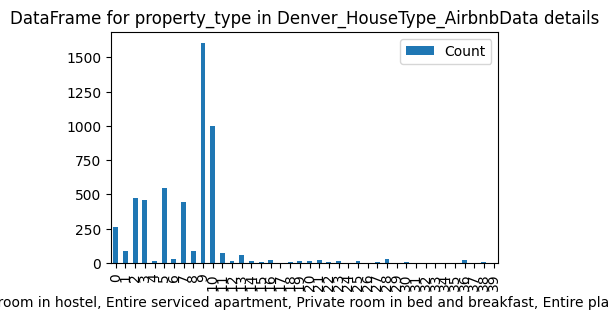

,Type,EntryOfTheType,Top1Popular,Top1PopularCount,Top2Popular,Top2PopularCount,Top3Popular,Top3PopularCount,Top4Popular,Top4PopularCount
0,room_type,4,Entire home/apt,4545,Private room,779,Shared room,36,Hotel room,7


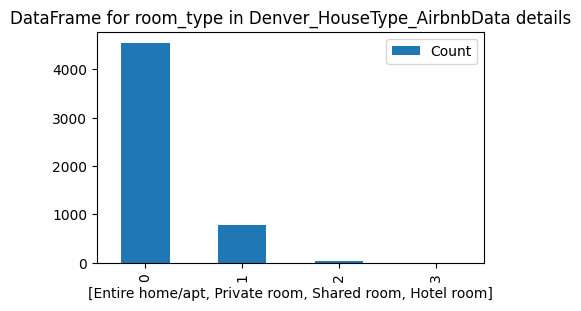

,Type,EntryOfTheType,Top1Popular,Top1PopularCount,Top2Popular,Top2PopularCount,Top3Popular,Top3PopularCount,Top4Popular,Top4PopularCount
0,accommodates,16,2,1746,4,1385,6,658,3,414


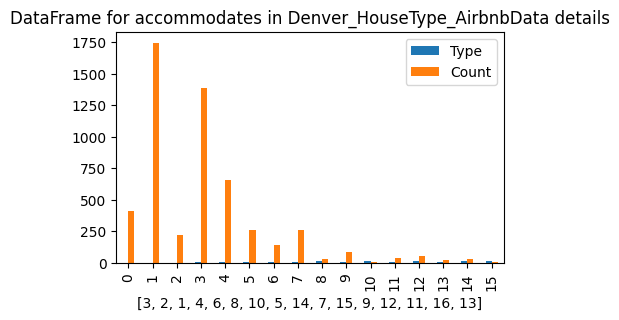

,Type,EntryOfTheType,Top1Popular,Top1PopularCount,Top2Popular,Top2PopularCount,Top3Popular,Top3PopularCount,Top4Popular,Top4PopularCount
0,bedrooms,11,1.0,1879,2.0,1494,-1.0,903,3.0,689


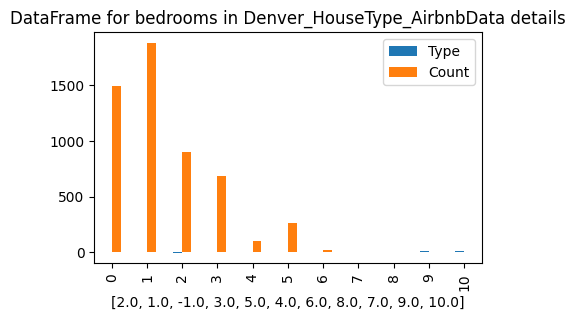

,Type,EntryOfTheType,Top1Popular,Top1PopularCount,Top2Popular,Top2PopularCount,Top3Popular,Top3PopularCount,Top4Popular,Top4PopularCount
0,beds,17,1.0,2103,2.0,1651,3.0,806,4.0,365


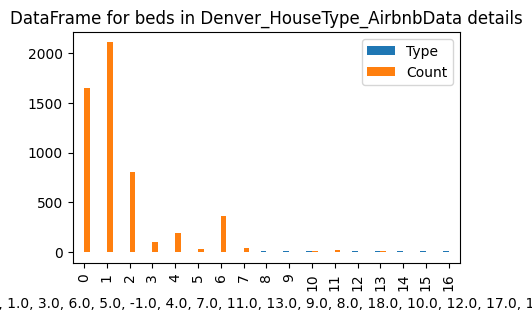

,Type,EntryOfTheType,Top1Popular,Top1PopularCount,Top2Popular,Top2PopularCount,Top3Popular,Top3PopularCount,Top4Popular,Top4PopularCount
0,price,569,99.0,101,100.0,94,125.0,79,150.0,75


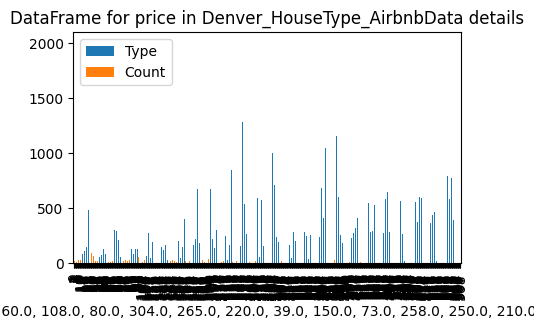

In [286]:
#show the top data as well as plot the overall information for different type of coloumn
columnToBeCount = ['property_type', 'room_type', 'accommodates', 'bedrooms', 'beds', 'price']
columnDetail(columnToBeCount, DenverHouseModel)

,Type,EntryOfTheType,Top1Popular,Top1PopularCount,Top2Popular,Top2PopularCount,Top3Popular,Top3PopularCount,Top4Popular,Top4PopularCount
0,property_type,102,Entire rental unit,33616,Private room in rental unit,14439,Private room in home,10672,Entire condo,8682


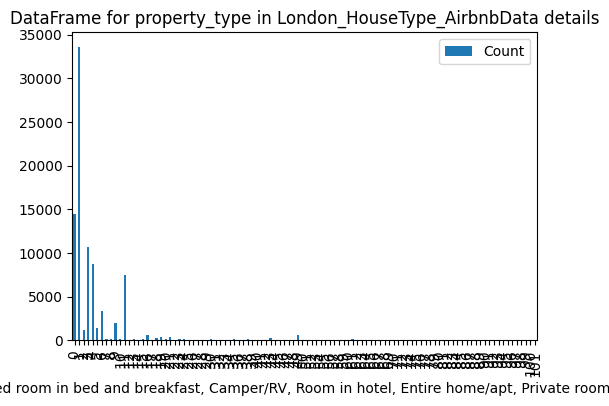

,Type,EntryOfTheType,Top1Popular,Top1PopularCount,Top2Popular,Top2PopularCount,Top3Popular,Top3PopularCount,Top4Popular,Top4PopularCount
0,room_type,4,Entire home/apt,54379,Private room,32663,Shared room,440,Hotel room,219


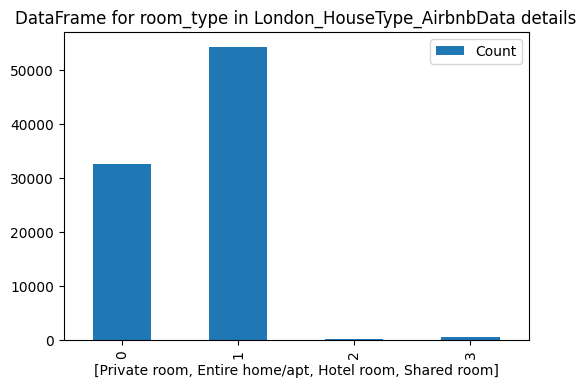

,Type,EntryOfTheType,Top1Popular,Top1PopularCount,Top2Popular,Top2PopularCount,Top3Popular,Top3PopularCount,Top4Popular,Top4PopularCount
0,accommodates,16,2,36564,4,17930,1,11121,6,6596


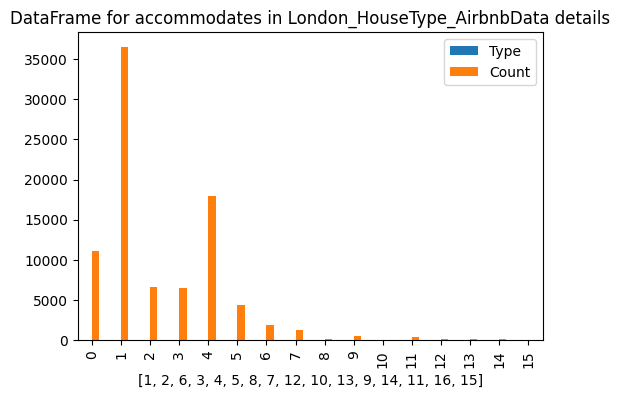

,Type,EntryOfTheType,Top1Popular,Top1PopularCount,Top2Popular,Top2PopularCount,Top3Popular,Top3PopularCount,Top4Popular,Top4PopularCount
0,bedrooms,22,-1.0,32738,1.0,27123,2.0,18097,3.0,6303


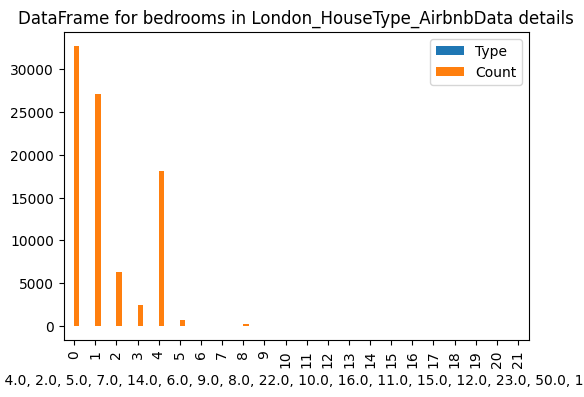

,Type,EntryOfTheType,Top1Popular,Top1PopularCount,Top2Popular,Top2PopularCount,Top3Popular,Top3PopularCount,Top4Popular,Top4PopularCount
0,beds,25,1.0,48282,2.0,21653,3.0,9102,4.0,4307


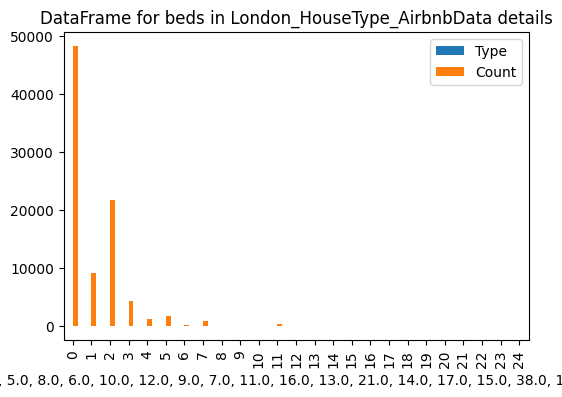

,Type,EntryOfTheType,Top1Popular,Top1PopularCount,Top2Popular,Top2PopularCount,Top3Popular,Top3PopularCount,Top4Popular,Top4PopularCount
0,price,1238,100.0,2156,150.0,1953,50.0,1950,60.0,1744


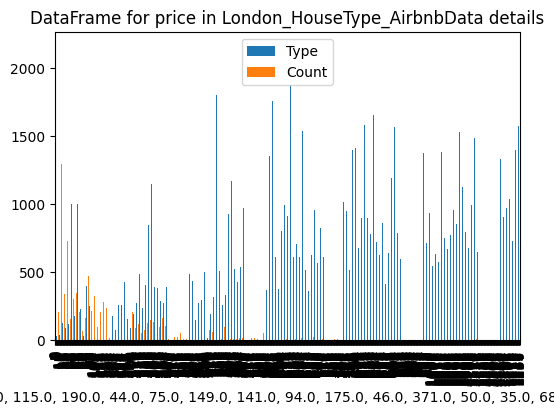

In [241]:
#London information for certain coloumn
columnDetail(columnToBeCount, LondonHouseModel)

TimeSlice of AirBnB

In [277]:
airbnb_df.columns

Index(['id', 'description', 'neighborhood_overview', 'host_neighbourhood',
       'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bathrooms_text', 'bedrooms', 'beds',
       'price', 'has_availability', 'number_of_reviews',
       'number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review',
       'last_review', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable',
       'calculated_host_listings_count', 'reviews_per_month'],
      dtype='object')

In [278]:
bnbCleanLon.columns

Index(['id', 'description', 'neighborhood_overview', 'host_neighbourhood',
       'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bathrooms_text', 'bedrooms', 'beds',
       'price', 'has_availability', 'number_of_reviews',
       'number_of_reviews_ltm', 'number_of_reviews_l30d', 'first_review',
       'last_review', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable',
       'calculated_host_listings_count', 'reviews_per_month',
       'starbucks_distances', 'starbucks_review_mentions'],
      dtype='object')

In [279]:
#TimeSlice For Denver
TimeFRColumn=['id', 'first_review'
]
DenverTimeFRModel=airbnb_df[TimeFRColumn]
LondonTimeFRModel=bnbCleanLon[TimeFRColumn]

In [348]:
def TimeSliceForNewAirbnb(dataframe, timespan):
    # Remove rows where 'first_review' is equal to -1
    
    Denverfiltered_df = dataframe[dataframe['first_review'] != -1]

    # Reset the index if needed
    Denverfiltered_df = Denverfiltered_df.reset_index(drop=True)

    # Extract month, week, and quarter from 'first_review'
    Denverfiltered_df['first_review'] = pd.to_datetime(Denverfiltered_df['first_review'])
    
    if timespan == 'month':
        Denverfiltered_df['month'] = Denverfiltered_df['first_review'].dt.month
        month_counts = Denverfiltered_df['first_review'].dt.month.value_counts().sort_index()

        # Create a bar plot
        plt.bar(month_counts.index, month_counts.values,color='#cf273c')
        plt.xticks(range(1,13),labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
        # Set plot labels and title
        plt.xlabel('Month')
        plt.ylabel('Count')
        plt.title(f'New Listing AirBnb per {timespan} in {dataframe.name}')
    
    
    elif timespan == 'year':
        Denverfiltered_df['year'] = Denverfiltered_df['first_review'].dt.year
        year_counts = Denverfiltered_df['first_review'].dt.year.value_counts().sort_index()

        # Create a bar plot
        plt.bar(year_counts.index, year_counts.values,color='#f5abb7')

        # Set plot labels and title
        plt.xlabel('Year')
        plt.ylabel('Count')
        plt.title(f'New Listing AirBnb per {timespan} in {dataframe.name}')
        
    elif timespan == 'quarter':
        Denverfiltered_df['quarter'] = Denverfiltered_df['first_review'].dt.quarter
        
        # First Review by Quarter to project assumption of how many new Airbnb by Quarter
        quarter_counts = Denverfiltered_df['first_review'].dt.quarter.value_counts().sort_index()

        # Create a bar plot
        plt.bar(quarter_counts.index, quarter_counts.values,color='#eb4035')
        plt.xticks(range(1,5))
        # Set plot labels and title
        plt.xlabel('Quarter')
        plt.ylabel('Count')
        plt.title(f'New Listing AirBnb per {timespan} in {dataframe.name}')

    # Show the plot
    plt.show()

In [344]:
M='month'
Q='quarter'
Y='year'

In [345]:
#Combined info london and denver
Den_Lon_combinedNewBnb_df = pd.concat([DenverTimeFRModel, LondonTimeFRModel],ignore_index=True)
Den_Lon_combinedNewBnb_df=NamedDataFrame(Den_Lon_combinedNewBnb_df, name="LondonDenverCombined_HouseType_AirbnbData")

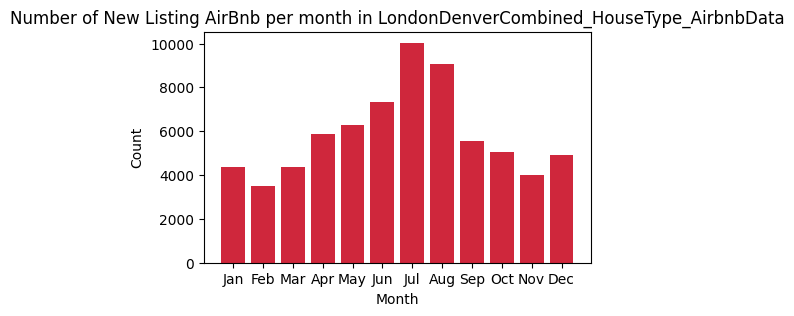

In [346]:
TimeSliceForNewAirbnb(Den_Lon_combinedNewBnb_df,M)

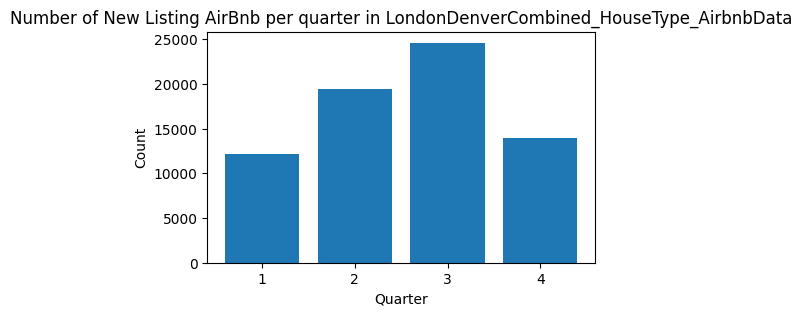

In [293]:
TimeSliceForNewAirbnb(Den_Lon_combinedNewBnb_df,Q)

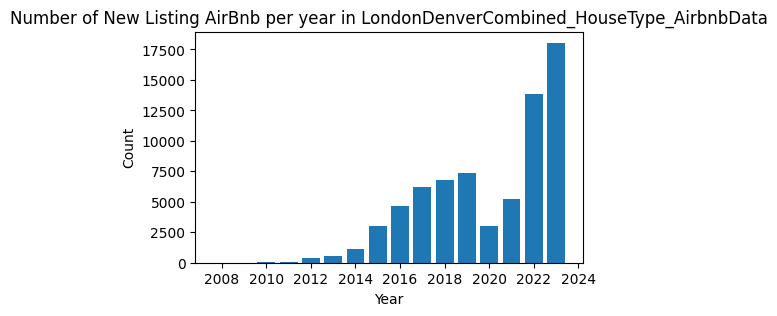

In [294]:
TimeSliceForNewAirbnb(Den_Lon_combinedNewBnb_df,Y)

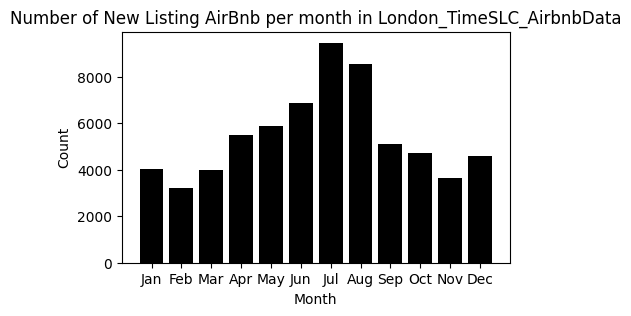

In [338]:

TimeSliceForNewAirbnb(LondonTimeFRModel,M)

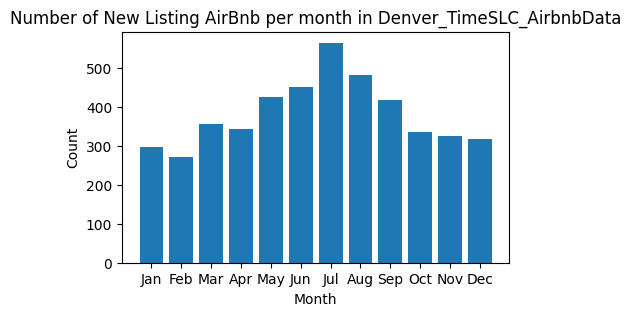

In [296]:

TimeSliceForNewAirbnb(DenverTimeFRModel,M)

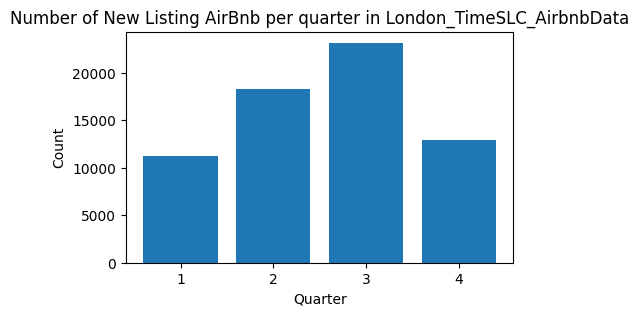

In [297]:
TimeSliceForNewAirbnb(LondonTimeFRModel,Q)

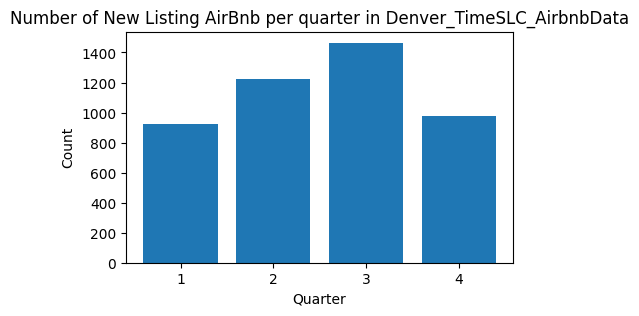

In [298]:
TimeSliceForNewAirbnb(DenverTimeFRModel,Q)

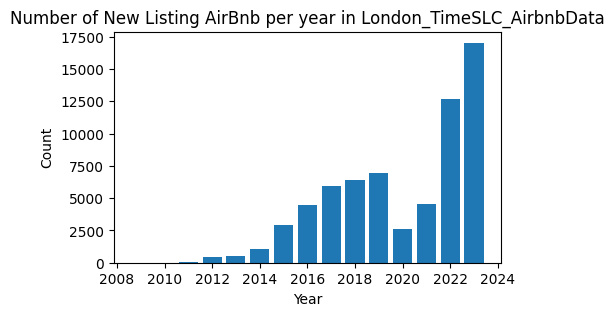

In [299]:
TimeSliceForNewAirbnb(LondonTimeFRModel,Y)

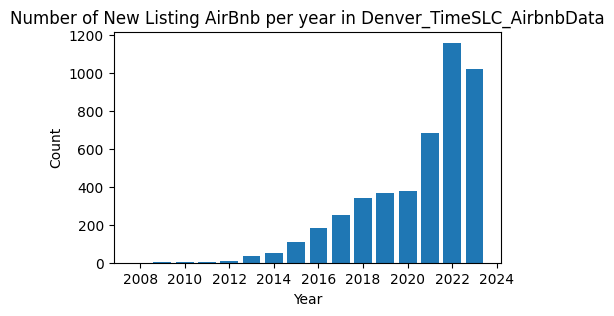

In [300]:
TimeSliceForNewAirbnb(DenverTimeFRModel,Y)

Map Below

In [301]:
#Collect Df for both London and Denver
Den_Lon_merged_df = pd.concat([DenverBNBDF, LocationLondonBNB],ignore_index=True).sort_values(by='ListingNumber',ascending=False)
Den_Lon_merged_df

,Neighborhood,Latitude,Longitude,ListingNumber
5,Hampstead,51.552370,-0.199540,1239
6,Shoreditch,51.524250,-0.069970,1140
7,LB of Brent,51.530310,-0.217130,1012
8,LB of Islington,51.568610,-0.112700,950
9,LB of Haringey,51.584780,-0.160570,934
0,Five Points,39.766720,-104.979060,320
1,Northwest,39.765020,-105.033640,296
2,West,39.707190,-105.018780,277
3,Northeast,39.756840,-104.855250,257
4,Highland,39.766415,-105.002098,254


In [44]:
#By Cindy:find top 5 Neighborhood in London and Denver
from collections import Counter
import pandas as pd

def TopDensityBNB(dataframe, dataframe_name):
    neib = dataframe['host_neighbourhood'].tolist()
    print(f"There are {len(set(neib))} Neighborhoods included in {dataframe_name}")
    
    freq_count = Counter(neib)
    
    most_five = freq_count.most_common(6)
    print("The most popular Neighborhoods are listed below :")

    desiredRegionList = []
    latitudeList = []
    longtitudeList = []
    ListingNum=[]
    #for neighborhood, count in most_five:
        #print(f"{neighborhood}: {count} listings")


    for neighborhood, count in most_five[1:]:  # Skip the first one since it's the same as the second
        region_data = dataframe[dataframe['host_neighbourhood'] == neighborhood]
        desiredRegionList.append(neighborhood)
        if not region_data.empty:
            latitude = region_data['latitude'].values[0]
            longitude = region_data['longitude'].values[0]
            latitudeList.append(latitude)
            longtitudeList.append(longitude)
            ListingNum.append(count)
            #print(f"The latitude of {neighborhood} is: {latitude}, The longitude is: {longitude}")


    TopFiveDistrict = {
        'Neighborhood': desiredRegionList,
        'Latitude': latitudeList,
        'Longitude': longtitudeList,
        'ListingNumber':ListingNum
    }
    
    TopFiveDF = pd.DataFrame(TopFiveDistrict)
    
    return TopFiveDF

In [302]:
TopDensityBNB (bnbCleanLon,bnbCleanLon.name)

There are 629 Neighborhoods included in London_AirbnbData
The most popular Neighborhoods are listed below :


,Neighborhood,Latitude,Longitude,ListingNumber
0,Hampstead,51.55237,-0.19954,1239
1,Shoreditch,51.52425,-0.06997,1140
2,LB of Brent,51.53031,-0.21713,1012
3,LB of Islington,51.56861,-0.11270,950
4,LB of Haringey,51.58478,-0.16057,934


In [303]:
LocationLondonBNB=TopDensityBNB (bnbCleanLon,bnbCleanLon.name)

There are 629 Neighborhoods included in London_AirbnbData
The most popular Neighborhoods are listed below :


In [48]:
#Map of Top 5 Bnb  London,this method can apply to multiple data :
def bnbLocation(dataframe):
    LocationList = dataframe['Neighborhood']
    LatitudeList = dataframe['Latitude']
    LongitudeList = dataframe['Longitude']
    RankList=[]
#    dataframe['Rank']=RankList
    location_Dict = {}

    for loc, lat, lon in zip(LocationList, LatitudeList, LongitudeList):
        location_Dict[loc] = (lat, lon)
    #,popup=folium.Popup('Top2 Popular AirbnbLocation',parse_html=True)
    dict_iterator = iter(location_Dict.items())

    # Use the next() function to retrieve the first item
    first_item = next(dict_iterator)
    my_co_map=folium.Map(location=first_item[1],zoom_start=12)
    icon_airbnb = folium.Icon(color='red')

    for location,coords in location_Dict.items():
        sorted_items = sorted(location_Dict.items(), key=lambda x: x[1], reverse=True)

    # Find the rank of the item based on its value
        rank = next((index for index, (key, value) in enumerate(sorted_items) if key == location), None)
        
        if rank is not None:
            
            rank += 1  # Adjust rank to start from 1 instead of 0
        #    RankList.append(rank)
            print(f"The rank of '{location}' is {rank}.")
            
        else:
            print(f"'{location}' is not in the dictionary.")
        
        folium.Marker(location=coords,radius=500,
                        popup=f"Top {rank} -- {location}",
                        color="#3186cc",
                        icon=folium.Icon(color='red' ,prefix='fa'),
                        fill_color="#3186cc").add_to(my_co_map)
        

    mapStr=f"{Den_Lon_merged_df.name}.html"    
    my_co_map.save(mapStr)
    return my_co_map

In [49]:
LondonMap=bnbLocation(LocationLondonBNB)
LondonMap

The rank of 'Hampstead' is 3.
The rank of 'Shoreditch' is 5.
The rank of 'LB of Brent' is 4.
The rank of 'LB of Islington' is 2.
The rank of 'LB of Haringey' is 1.


In [50]:
#Top five in Denver Original No method defined, works fine, do not modify

most_five=freq_count.most_common(6)

desired_region1=most_five[0][0]
#print(desired_region1)
region_data1=airbnb_df[airbnb_df['host_neighbourhood']==desired_region1]
if not region_data1.empty:
    latitude1=region_data1['latitude'].values[0]
    longitude1=region_data1['longitude'].values[0]
#    print(f"The latitude of {desired_region1} is:{latitude1},The longitude of {desired_region1} is:{longitude1}")

desired_region2=most_five[1][0]
#print(desired_region2)
region_data2=airbnb_df[airbnb_df['host_neighbourhood']==desired_region2]
if not region_data2.empty:
    latitude2=region_data2['latitude'].values[0]
    longitude2=region_data2['longitude'].values[0]
 #   print(f"The latitude of {desired_region2} is:{latitude2},The longitude of {desired_region2} is:{longitude2}")

desired_region3=most_five[3][0]
#print(desired_region3)
region_data3=airbnb_df[airbnb_df['host_neighbourhood']==desired_region3]
if not region_data3.empty:
    latitude3=region_data3['latitude'].values[0]
    longitude3=region_data3['longitude'].values[0]
 #   print(f"The latitude of {desired_region3} is:{latitude3},The longitude of {desired_region3} is:{longitude3}")

desired_region4=most_five[4][0]
#print(desired_region4)
region_data4=airbnb_df[airbnb_df['host_neighbourhood']==desired_region4]
if not region_data4.empty:
    latitude4=region_data4['latitude'].values[0]
    longitude4=region_data4['longitude'].values[0]
#    print(f"The latitude of {desired_region4} is:{latitude4},The longitude of {desired_region4} is:{longitude4}")

desired_region5=most_five[5][0]
#print(desired_region5)
region_data5=airbnb_df[airbnb_df['host_neighbourhood']==desired_region5]
if not region_data5.empty:
    latitude5=region_data5['latitude'].values[0]
    longitude5=region_data5['longitude'].values[0]
#    print(f"The latitude of {desired_region5} is:{latitude5},The longitude of {desired_region5} is:{longitude5}")

DenverBNBDict={
    'Neighborhood':[most_five[0][0],most_five[1][0],most_five[3][0],most_five[4][0],most_five[5][0]],
    'Latitude':[latitude1,latitude2,latitude3,latitude4,latitude5],
    'Longitude':[longitude1,longitude2,longitude3,longitude4,longitude5],
    'ListingNumber':[most_five[0][1],most_five[1][1],most_five[3][1],most_five[4][1],most_five[5][1]]
    
}

DenverBNBDF=pd.DataFrame(DenverBNBDict)


In [51]:
#Map of Top 5 Bnb Denver
locations={
    desired_region1:(latitude1,longitude1),
    desired_region2:(latitude2,longitude2),
    desired_region3:(latitude3,longitude3),
    desired_region4:(latitude4,longitude4),
    desired_region5:(latitude5,longitude5)

}
#,popup=folium.Popup('Top2 Popular AirbnbLocation',parse_html=True)
mymap=folium.Map(location=[latitude2,longitude2],zoom_start=12)
icon_airbnb = folium.Icon(color='red')

for location,coords in locations.items():
    sorted_items = sorted(locations.items(), key=lambda x: x[1], reverse=True)

# Find the rank of the item based on its value
    rank = next((index for index, (key, value) in enumerate(sorted_items) if key == location), None)

    if rank is not None:
        rank += 1  # Adjust rank to start from 1 instead of 0
        print(f"The rank of '{location}' is {rank}.")
    else:
        print(f"'{location}' is not in the dictionary.")
    
    folium.Marker(location=coords,radius=500,
                    popup=f"Top {rank} -- {location}",
                    color="#3186cc",
                    icon=folium.Icon(color='red' ,prefix='fa'),
                    fill_color="#3186cc").add_to(mymap)
    
mymap.save("map2.html")

The rank of 'Five Points' is 1.
The rank of 'Northwest' is 3.
The rank of 'West' is 5.
The rank of 'Northeast' is 4.
The rank of 'Highland' is 2.


In [158]:
#Print the denver bnb map out
mymap

In [74]:
#Open map to HTML edition, run if required

html_path="map2.html"
webbrowser.open_new_tab(html_path)

True

In [54]:
#combine map together
DenLonBNB_DF=bnbLocation (Den_Lon_merged_df)
DenLonBNB_DF

The rank of 'Hampstead' is 3.
The rank of 'Shoreditch' is 5.
The rank of 'LB of Brent' is 4.
The rank of 'LB of Islington' is 2.
The rank of 'LB of Haringey' is 1.
The rank of 'Five Points' is 6.
The rank of 'Northwest' is 8.
The rank of 'West' is 10.
The rank of 'Northeast' is 9.
The rank of 'Highland' is 7.


In [55]:
#Open map as HTML if need
html_path=f"{Den_Lon_merged_df.name}.html"
webbrowser.open_new_tab(html_path)

True

# Starbucks Data Cleaning

In [56]:
starbucks_df.columns

Index(['store_id', 'level_0', 'index', 'countryCode', 'ownershipTypeCode',
       'latitude', 'longitude', 'city', 'countrySubdivisionCode', 'postalCode',
       'distance_to_den'],
      dtype='object')

In [57]:
starCleanLon.columns

Index(['store_id', 'index', 'countryCode', 'ownershipTypeCode', 'latitude',
       'longitude', 'city', 'countrySubdivisionCode', 'postalCode',
       'distance_to_den', 'airbnb_distances'],
      dtype='object')

In [58]:
starbucks_columns_tokeep = \
['store_id', 'latitude', 'longitude',  'postalCode']



In [59]:
starbucks_df_location = starbucks_df[starbucks_columns_tokeep]
starbucks_London_location = starCleanLon[starbucks_columns_tokeep]
starbucks_London_location.to_csv("Star_London_Location.csv")
starbucks_df_location.to_csv("Star_Denver_Location.csv")

In [60]:
CombinedStar=pd.concat([starbucks_df_location, starbucks_London_location],ignore_index=True)
CombinedStar.to_csv("Star_Location.csv")

In [61]:

#Read File and find the Location
filename= 'Star_Location.csv'
keys=('store_id','latitude', 'longitude')
records=[]
with open(filename,'r') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        records.append({key:row[key] for key in keys})
print(records[0])

{'store_id': '1743', 'latitude': '39.65278', 'longitude': '-104.928197'}


In [105]:
#Original code for 'mymap' Denver area, no need to modify, optimized edition in a few notebooks below
starbucks_map=folium.Map(location=(locations[desired_region4]),zoom_start=12)
star_longitude=[a['longitude'] for a in records]
star_latitude=[a['latitude'] for a in records]
FastMarkerCluster(data=list(zip(star_latitude,star_longitude))).add_to(DenLonBNB_DF)

folium.CircleMarker(locations[desired_region1],
                    radius=100,color='purple',fill_color='purple'
                   ).add_to(DenLonBNB_DF)

folium.CircleMarker(locations[desired_region2],
                    radius=100,color='red',fill_color='crimson'
                   ).add_to(DenLonBNB_DF)
folium.CircleMarker(locations[desired_region3],
                    radius=100,color='yellow',fill_color='yellow'
                   ).add_to(DenLonBNB_DF)
folium.CircleMarker(locations[desired_region4],
                    radius=100,fill_color='blue'
                   ).add_to(DenLonBNB_DF)
folium.CircleMarker(locations[desired_region5],
                    radius=100,color='black',fill_color='black'
                   ).add_to(DenLonBNB_DF)



In [160]:
DenLonBNB_DF

In [75]:
import random
def Circle_London_Top(dataframe):
    LocationList = dataframe['Neighborhood']
    LatitudeList = dataframe['Latitude']
    LongitudeList = dataframe['Longitude']
    RankList=[]
#    dataframe['Rank']=RankList
    location_Dict = {}

    for loc, lat, lon in zip(LocationList, LatitudeList, LongitudeList):
        location_Dict[loc] = (lat, lon)
    #,popup=folium.Popup('Top2 Popular AirbnbLocation',parse_html=True)
    dict_iterator = iter(location_Dict.items())

    # Use the next() function to retrieve the first item
    first_item = next(dict_iterator)
    starbucks_map=folium.Map(location=first_item[1],zoom_start=12)

    colors = ['#FF0000', '#FFA500', '#FFFF00', '#008000', '#0000FF', '#4B0082', '#800080']

    for location,coords in location_Dict.items():
        sorted_items = sorted(location_Dict.items(), key=lambda x: x[1], reverse=True)
        random_colors = ['#{:02x}{:02x}{:02x}'.format(random.randint(0, 255), random.randint(0, 255), random.randint(0, 255)) for _ in range(5)]
        # Add CircleMarker elements with random colors to the map
        for color in random_colors:
            folium.CircleMarker(
                location=coords,
                radius=100,
                color=color,
                fill=False,
                fillcolor=color,
                fill_opacity=0.4
                
                
                
            ).add_to(DenLonBNB_DF)            

#    mapStr=f"{Circle_London_Top.name}.html"    
    starbucks_map.save("FinalMap.html")
    return DenLonBNB_DF

In [161]:
Circle_London_Top(LocationLondonBNB)

In [72]:
#Save map for denver area as HTML run if need
mymap.save('my_denvermap_app.html')


In [73]:
#open map for denver area as HTML run id need
html_path="my_denvermap_app.html"
webbrowser.open_new_tab(html_path)

True

In [328]:
#Define name of dataframe
class NamedDataFrame(pd.DataFrame):
    def __init__(self, *args, name=None, **kwargs):
        super().__init__(*args, **kwargs)
        self.name = name

airbnb_df = NamedDataFrame(airbnb_df, name="Denver_AirbnbData")
bnbCleanLon = NamedDataFrame(bnbCleanLon, name="London_AirbnbData")
Den_Lon_merged_df = NamedDataFrame(Den_Lon_merged_df, name="Denver_London_AirbnbData")
DenverTimeFRModel= NamedDataFrame(DenverTimeFRModel, name="Denver_TimeSLC_AirbnbData")
LondonTimeFRModel= NamedDataFrame(LondonTimeFRModel, name="London_TimeSLC_AirbnbData")
DenverHouseModel=NamedDataFrame(DenverHouseModel, name="Denver_HouseType_AirbnbData")
LondonHouseModel=NamedDataFrame(LondonHouseModel, name="London_HouseType_AirbnbData")
#Den_Lon_combinedNewBnb_df=NamedDataFrame(Den_Lon_combinedNewBnb_df, name="LondonDenverCombined_HouseType_AirbnbData")